In [1]:
import pandas as pd
import h5py
from pathlib import Path
import logging
import logging.config
import yaml

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import  array_to_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
import tensorflow.keras.backend as K
import os

import storage
import extraction
import captiongeneration


import zipfile
import urllib
import re
from itertools import chain
import pickle

from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Lambda, GlobalAveragePooling2D , AveragePooling2D 
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


%matplotlib inline

In [2]:
import yaml
import logging
import logging.config
def setupLogging():
    with open('../config/logConfig.yml', 'rt') as file:
        config = yaml.safe_load(file.read())
        logging.config.dictConfig(config)

In [3]:
setupLogging()
logger = logging.getLogger()

In [ ]:
import captiongeneration

import matplotlib.pyplot as plt
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions



for i in range(19885,19890):
    #classification, caption, image = captiongeneration.classification_generation("train", i, 16)
    generated_caption, caption, image = captiongeneration.caption_generation("train", i, 15)
    
    print("generated")
    #print(classification)
    #print(generated_caption)
    print("old")
    print(caption)
    image += [103.939, 116.779, 123.68]
    image /= 255.0
    
    image = tf.reshape(image, (224, 224, 3))
    imageBGR = image.numpy()[:,:,(2,1,0)] 

    for i in range(120,122):
        print(image.numpy()[i,i,0])
    plt.imshow(imageBGR)
    plt.show()

In [ ]:

status, image, caption = storage.read_image("train", 10005)


In [ ]:
image.shape

In [ ]:
import tensorflow.keras.backend as K
m = K.expand_dims(image, axis=0)

In [ ]:
m.shape

In [ ]:
import pickle
import model
from tensorflow.keras.optimizers import Adam
try:
    with open("../data/preprocessor.pickle", 'rb') as handle:
        preprocessor = pickle.load(handle)
except FileNotFoundError:      
    preprocessor = GloVepreprocessing.GloVepreprocessor()
    with open("../data/preprocessor.pickle", 'wb') as handle:
        print("before pickle dump")
        pickle.dump(preprocessor, handle)


# Loads model and weights
training_model, inference_initialiser_model, inference_model = model.ShowAndTell(preprocessor.MAX_SEQUENCE_LENGTH, preprocessor.VOCAB_SIZE, preprocessor.EMBEDDING_SIZE, 60, preprocessor.weights)

embedded_generated_caption = preprocessor.GloVe_embed(preprocessor.get_sequences_ids([['once','upon']]))
logger.debug("-------------Generated Caption---------------: " + " ".join(['once','upon']))
#logger.debug("-------------Embedded Generated Caption---------------: " + " ".join(len(embedded_generated_caption)))
len(embedded_generated_caption)

#loss_function = preprocessor.get_loss_function()
#training_model.compile(loss=loss_function, optimizer=Adam(lr = 0.001), metrics=['accuracy'])
#training_model.summary()


In [ ]:
text_to_word_sequence("once upon a time")

In [10]:
# Reads captions and images stored in the validate/train hdf5 files from start_index to end_index
def read_file(set_name, start_index, end_index): 
      
    file_nb = storage.get_file_numbers(start_index, end_index)

    for nb in range(file_nb[0], file_nb[1]+1):
        file_path, lock_path = storage.get_path(set_name, nb)
        start_idx = nb * storage.get_file_size() if nb > file_nb[0] else start_index
        end_idx = (nb + 1) * storage.get_file_size() if nb < file_nb[1] else end_index

        for idx in range(start_idx, end_idx):
            try:
                status, image, features, caption, = storage.read_image(set_name, idx)  
                if (int(status) == 200):

                    print(image.shape)
                    print(str(caption))
                    print(image.dtype)

                    x = image.reshape((1,) + image.shape)
                    print(x.shape)
                    plt.imshow(image)
                    plt.show()

            except KeyError:
                # Ignores files not found - probably an HHTP error when requesting the URL
                # Later - Keep count of the minning files to know the exact size of the dataset
                print("Missing index - image not found - probably an HHTP error when requesting the URL " + str(idx))
                continue 
   

    return

INSIDE GET_PATH
INSIDE GET_PATH../data/img/train_le_retour_0.h5../data/img/train_le_retour_0.h5.lock
---------------------------------INSIDE THE READ_IMAGE train_le_retour0
INSIDE GET_PATH
INSIDE GET_PATH../data/img/train_le_retour_0.h5../data/img/train_le_retour_0.h5.lock
---------------------------------INSIDE THE READ_IMAGE, AFTERget_path ../data/img/train_le_retour_0.h5
---------------------------------INSIDE THE READ_IMAGE, AFTER THR File <HDF5 file "train_le_retour_0.h5" (mode r)>
(300, 300, 3)
a man holds what is believed to be some of the debris that caused damage to vehicles monday afternoon after airliner returned to airport following problems after take off .
uint8
(1, 300, 300, 3)


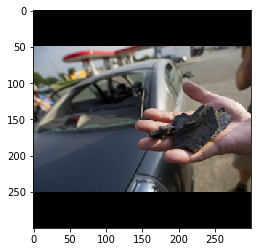

---------------------------------INSIDE THE READ_IMAGE train_le_retour0
INSIDE GET_PATH
INSIDE GET_PATH../data/img/train_le_retour_0.h5../data/img/train_le_retour_0.h5.lock
---------------------------------INSIDE THE READ_IMAGE, AFTERget_path ../data/img/train_le_retour_0.h5
---------------------------------INSIDE THE READ_IMAGE, AFTER THR File <HDF5 file "train_le_retour_0.h5" (mode r)>
(300, 300, 3)
where 's the best place to show off your nails ? right in front of the castle , of course !
uint8
(1, 300, 300, 3)


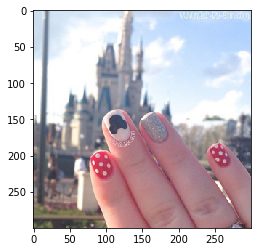

---------------------------------INSIDE THE READ_IMAGE train_le_retour0
INSIDE GET_PATH
INSIDE GET_PATH../data/img/train_le_retour_0.h5../data/img/train_le_retour_0.h5.lock
---------------------------------INSIDE THE READ_IMAGE, AFTERget_path ../data/img/train_le_retour_0.h5
---------------------------------INSIDE THE READ_IMAGE, AFTER THR File <HDF5 file "train_le_retour_0.h5" (mode r)>
(300, 300, 3)
that combines elements of a simple vegetable and dish
uint8
(1, 300, 300, 3)


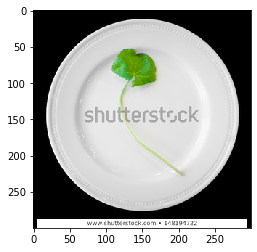

---------------------------------INSIDE THE READ_IMAGE train_le_retour0
INSIDE GET_PATH
INSIDE GET_PATH../data/img/train_le_retour_0.h5../data/img/train_le_retour_0.h5.lock
---------------------------------INSIDE THE READ_IMAGE, AFTERget_path ../data/img/train_le_retour_0.h5
---------------------------------INSIDE THE READ_IMAGE, AFTER THR File <HDF5 file "train_le_retour_0.h5" (mode r)>
(300, 300, 3)
transformers : till all are issue # 4b
uint8
(1, 300, 300, 3)


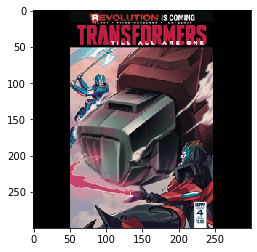

---------------------------------INSIDE THE READ_IMAGE train_le_retour0
INSIDE GET_PATH
INSIDE GET_PATH../data/img/train_le_retour_0.h5../data/img/train_le_retour_0.h5.lock
---------------------------------INSIDE THE READ_IMAGE, AFTERget_path ../data/img/train_le_retour_0.h5
---------------------------------INSIDE THE READ_IMAGE, AFTER THR File <HDF5 file "train_le_retour_0.h5" (mode r)>
(300, 300, 3)
illustration of a little girl taking a bath
uint8
(1, 300, 300, 3)


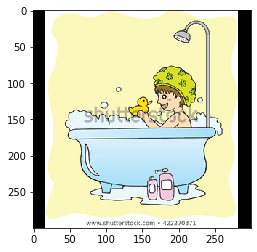

In [11]:
read_file("train_le_retour", 10, 15)
   

In [ ]:
# Reads status stored in the validate/train hdf5 files from start_index to end_index
def read_status(set_name, start_index, end_index): 
      
    file_nb = storage.get_file_numbers(start_index, end_index)
    statuslist = []

    for nb in range(file_nb[0], file_nb[1]+1):
        file_path, lock_path = storage.get_path(set_name, nb)
        start_idx = nb * storage.get_file_size() if nb > file_nb[0] else start_index
        end_idx = (nb + 1) * storage.get_file_size() if nb < file_nb[1] else end_index

        for idx in range(start_idx, end_idx):
            try:
                status, image, caption = storage.read_image(set_name, idx)  
                statuslist.append(int(status))

            except KeyError:
                # Ignores files not found - probably an HHTP error when requesting the URL
                # Later - Keep count of the minning files to know the exact size of the dataset
                print("Missing index - image not found - probably an HHTP error when requesting the URL " + str(idx))
                continue 
   
    return statuslist

In [ ]:
df['status'] = pd.DataFrame(read_status("train", 99910, 100099))
print(df['status'].value_counts())

plt.hist(df["status"], bins = 18)
plt.style.use('ggplot')
plt.show()

In [ ]:
a = [[ 9.4755635e-02,  3.1283161e-01, -6.7922041e-02,  6.4237791e-01,
        2.2102470e+00, -5.1988786e-01, -9.8959517e-01,  3.5088462e-01,
        3.0951893e+00, -3.8163280e-01, -1.6836199e+00, -5.8072060e-01,
        1.4972074e+00,  3.3191606e-01,  1.0996586e+00,  4.2056244e-02,
        4.6159565e-01,  2.0012915e+00, -2.6618072e-01, -8.4128553e-01,
        1.2607530e-01,  1.5344251e+00, -1.5301496e-01, -4.7858629e-01,
       -2.9338709e-01, -1.2825260e+00, -6.1470848e-01, -5.0824857e-01,
        4.5474276e-01,  2.9351535e-01, -1.6820558e+00,  2.8028536e-01,
        7.1510404e-02, -1.1397541e-01,  1.6877573e-03, -1.3896689e+00,
       -7.1299994e-01, -5.5192190e-01,  1.3338147e+00,  9.0670723e-01,
        2.6833752e-02, -1.1447647e+00, -1.4083545e+00, -4.1518590e-01,
        1.0165511e+00,  2.6113531e-01,  6.4942271e-01, -1.2051920e+00,
       -8.8982397e-01, -2.7181625e-01]]
nparray(a).shape

In [ ]:
import tensorflow as tf
print(tf.__version__)


In [ ]:
r = np.array((300,300,3))
m = K.expand_dims(r, axis=0)

In [ ]:
print(r.shape)
print(m.shape)




In [ ]:
gen = preprocessor.generator("train", 8, start_index=0)
for i in gen:
    print("-----------------------")
    print((i[0][1]).shape)
    print((i[0][1][6][5]))
    print((i[0][1][6][13]))

    break

In [ ]:
for i in out_captions_idx[0]:
    print(processor.idx2word[i])



In [ ]:
pic = image.load_img("../data/panda.png", target_size = (224,224))
plt.imshow(pic)
plt.show()

In [ ]:
with open(r'config.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    config_parameters = yaml.load(file, Loader=yaml.FullLoader)

    print(config_parameters['images_per_storage'])

In [ ]:
config_parameters = None
try:
    with open("../data/config.pickle", 'rb') as handle:
        config_parameters = pickle.load(handle)
except FileNotFoundError:            
    with open(r'config.yaml') as file:
        config_parameters = yaml.load(file, Loader=yaml.FullLoader)
    with open("../data/config.pickle", 'wb') as handle:
        pickle.dump(config_file, handle)

In [ ]:
config_parameters

In [ ]:
from config import settings
print(settings.data_path)